Nome: Francisco Jerônimo da Silva Júnior <br>
Matrícula: 433399 <br>
Curso: Ciência da Computação <br>

# Data Preprocessing

The following tutorial contains Python examples for data preprocessing. You should refer to the "Data" chapter of the "Introduction to Data Mining" book to understand some of the concepts introduced in this tutorial. 


O pré-processamento de dados consiste em um amplo conjunto de técnicas para limpeza, seleção e transformação de dados para aprimorar a análise de mineração de dados. Leia as instruções passo a passo abaixo com cuidado. Para executar o código, clique na célula correspondente e pressione as teclas SHIFT-ENTER simultaneamente.

## 4.1 Problemas de qualidade de dados

A baixa qualidade dos dados pode ter um efeito adverso na mineração de dados. Entre os problemas comuns de qualidade de dados estão ruído, valores discrepantes, valores ausentes e dados duplicados. 

Começamos com um conjunto de dados de exemplo do repositório de aprendizado de máquina da UCI que contém informações sobre pacientes com câncer de mama.


### Primeiro, faça o download do conjunto de dados NFL Play by Play usando a função Pandas read_csv() e exiba seus primeiros 5 pontos de dados, exiba o número de instâncias e de atributos.

https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016/download

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  

In [4]:
df = pd.read_csv("NFL Play by Play 2009-2016 (v3).csv")

In [5]:
# visão geral do dataset
df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [4]:
# dimensões do dataset
df.shape

(362447, 102)

### Apenas para facilitar a atividade, cosidere as 30 primeiras colunas e descarte as restantes

In [6]:
df = df.iloc[:, 0:30]

In [7]:
df.shape

(362447, 30)

### Valores faltantes  (Missing Values)

Não é incomum que um objeto não tenha um ou mais valores de atributos. Em alguns casos, as informações não foram coletadas; enquanto em outros casos, alguns atributos são inaplicáveis às instâncias de dados. E

### 1 - Verique a quantidade de valores faltantes de cada atributo. Descarte as colunas que tem uma quantidade de valores faltantes maior que 10% do tamanho do conjunto de dados.

In [7]:
# retorna a quantidade de valores faltantes para cada feature
df.isnull().sum()

Date                  0
GameID                0
Drive                 0
qtr                   0
down              54218
time                188
TimeUnder             0
TimeSecs            188
PlayTimeDiff        374
SideofField         450
yrdln               723
yrdline100          723
ydstogo               0
ydsnet                0
GoalToGo            723
FirstDown         25597
posteam           21979
DefensiveTeam     21979
desc                  2
PlayAttempted         0
Yards.Gained          0
sp                    0
Touchdown             0
ExPointResult    353399
TwoPointConv     361919
DefTwoPoint      362433
Safety                0
Onsidekick            0
PuntResult       342560
PlayType              0
dtype: int64

In [8]:
# vai retonar uma série de valore booleanos
# True se a feature tem mais de 10% dos seus valores nulos, False, caso a porcentagem de valores faltantes seja inferior a 10%

lista_faltantes = df.isnull().sum() > (df.shape[0] * 0.1)

In [9]:
lista_faltantes

Date             False
GameID           False
Drive            False
qtr              False
down              True
time             False
TimeUnder        False
TimeSecs         False
PlayTimeDiff     False
SideofField      False
yrdln            False
yrdline100       False
ydstogo          False
ydsnet           False
GoalToGo         False
FirstDown        False
posteam          False
DefensiveTeam    False
desc             False
PlayAttempted    False
Yards.Gained     False
sp               False
Touchdown        False
ExPointResult     True
TwoPointConv      True
DefTwoPoint       True
Safety           False
Onsidekick       False
PuntResult        True
PlayType         False
dtype: bool

In [11]:
df = df.loc[:, ~lista_faltantes]

In [12]:
# 5 colunas foram descartadas
df.shape

(362447, 25)

### 2 - Substitua os valores ausentes da coluna 'FirstDown"  pelo valor mediano na coluna. Apresente um histograma com distribuição dos valores da coluna antes e depois da substituição.

In [13]:
# retorna a contagem dos valores presentes em 'FirstDown'
df['FirstDown'].value_counts()

0.0    238765
1.0     98085
Name: FirstDown, dtype: int64

In [14]:
# verifico a quantidade de valores faltantes na coluna
df['FirstDown'].isnull().sum()

25597

/home/jeronimojr/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jeronimojr/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


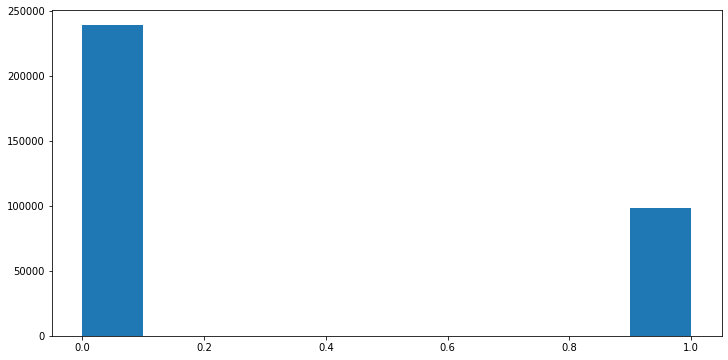

In [15]:
# plot antes de remover os valores faltantes
plt.figure(figsize=(12, 6))
plt.hist(x='FirstDown',data=df);

In [16]:
# substituo os valores faltantes pelo valor da mediana
df['FirstDown'].fillna(df['FirstDown'].median(), inplace=True)

In [17]:
# verifico novamente a quantidade de valores faltantes
df['FirstDown'].isnull().sum()

0

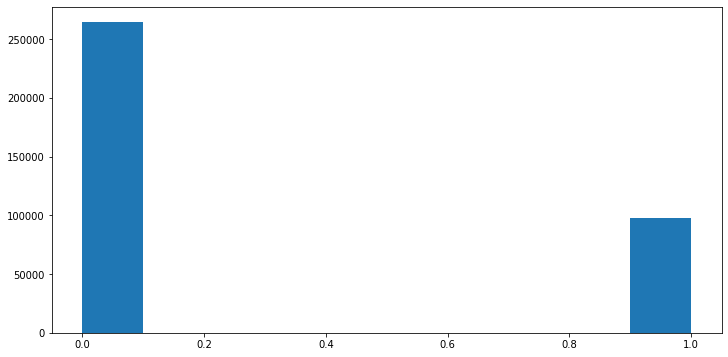

In [18]:
# plot depois da substituição dos valores faltantes pela mediana
plt.figure(figsize=(12, 6))
plt.hist(x='FirstDown',data=df);

### 3 - Substitua os valores ausentes na coluna "TimeSecs"  pelo valor médio da coluna. Apresente um histograma com distribuição dos valores da coluna antes e depois da substituição.


In [19]:
# valor médio da coluna TimeSecs
df['TimeSecs'].mean()

1695.2343461446092

In [20]:
# distribuição dos dados
df['TimeSecs'].value_counts()

 1800.0    4129
 900.0     3775
 2700.0    3514
 120.0     3058
 3600.0    3012
           ... 
-268.0        1
-892.0        1
-485.0        1
-659.0        1
-20.0         1
Name: TimeSecs, Length: 4329, dtype: int64

In [21]:
# verifico a quantidade de valores faltantes na coluna
df['TimeSecs'].isnull().sum()

188

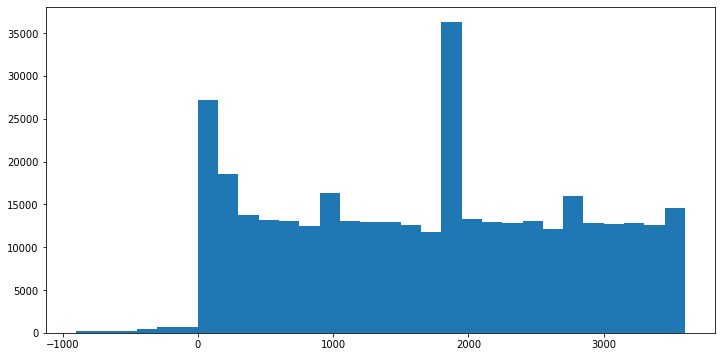

In [22]:
plt.figure(figsize=(12, 6))
plt.hist(x='TimeSecs', data=df, bins=30);

In [23]:
df['TimeSecs'].fillna(df['TimeSecs'].mean(), inplace=True)

In [24]:
df['TimeSecs'].isnull().sum()

0

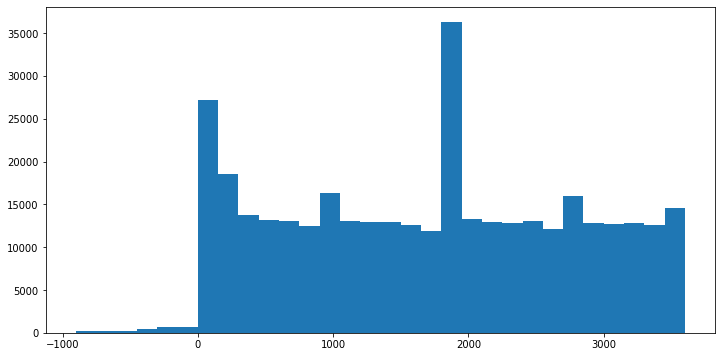

In [25]:
plt.figure(figsize=(12, 6))
plt.hist(x='TimeSecs', data=df, bins=30);

In [27]:
(df['TimeSecs'] < 0).sum()

2412

### 4 - Em vez de substituir os valores ausentes, outra abordagem comum é descartar os pontos de dados que contêm valores ausentes. Isso pode ser feito facilmente aplicando a função dropna(). Execute essa abordagem e exiba o número de linhas antes e depois desse tratamento. O ideal é que esse método seja aplicado apenas a atributos que tenham poucos valores faltantes.


In [28]:
# Número de linhas antes da remoção
df.shape[0]

362447

In [29]:
df.isnull().sum().between(1, 1000)

Date             False
GameID           False
Drive            False
qtr              False
time              True
TimeUnder        False
TimeSecs         False
PlayTimeDiff      True
SideofField       True
yrdln             True
yrdline100        True
ydstogo          False
ydsnet           False
GoalToGo          True
FirstDown        False
posteam          False
DefensiveTeam    False
desc              True
PlayAttempted    False
Yards.Gained     False
sp               False
Touchdown        False
Safety           False
Onsidekick       False
PlayType         False
dtype: bool

In [30]:
colunas_para_descarte = df.loc[:,df.isnull().sum().between(1, 1000)].columns

In [32]:
colunas_para_descarte

Index(['time', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100',
       'GoalToGo', 'desc'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           362447 non-null  object 
 1   GameID         362447 non-null  int64  
 2   Drive          362447 non-null  int64  
 3   qtr            362447 non-null  int64  
 4   time           362259 non-null  object 
 5   TimeUnder      362447 non-null  int64  
 6   TimeSecs       362447 non-null  float64
 7   PlayTimeDiff   362073 non-null  float64
 8   SideofField    361997 non-null  object 
 9   yrdln          361724 non-null  float64
 10  yrdline100     361724 non-null  float64
 11  ydstogo        362447 non-null  int64  
 12  ydsnet         362447 non-null  int64  
 13  GoalToGo       361724 non-null  float64
 14  FirstDown      362447 non-null  float64
 15  posteam        340468 non-null  object 
 16  DefensiveTeam  340468 non-null  object 
 17  desc           362445 non-nul

In [37]:
df.isnull().sum().describe([0.8, 0.9, 0.95])

count       25.000000
mean      1885.640000
std       6052.574651
min          0.000000
50%          0.000000
80%        504.600000
90%        723.000000
95%      17727.800000
max      21979.000000
dtype: float64

In [38]:
df = df.dropna(subset=colunas_para_descarte)

In [39]:
df.shape[0]

361526

### Outliers (Ruídos)

Os outliers são instâncias de dados com características consideravelmente diferentes do restante do conjunto de dados. 

### 5 -  Utilizabdo a matplotlib, apressente um boxplot para identificar as colunas na tabela que contêm outliers. Observe que os valores em todas as colunas que são originalmente armazenados como 'int64', com exceção do GameID.

In [41]:
df.dtypes

Date              object
GameID             int64
Drive              int64
qtr                int64
time              object
TimeUnder          int64
TimeSecs         float64
PlayTimeDiff     float64
SideofField       object
yrdln            float64
yrdline100       float64
ydstogo            int64
ydsnet             int64
GoalToGo         float64
FirstDown        float64
posteam           object
DefensiveTeam     object
desc              object
PlayAttempted      int64
Yards.Gained       int64
sp                 int64
Touchdown          int64
Safety             int64
Onsidekick         int64
PlayType          object
dtype: object

In [50]:
# 'TimeSecs'
col_plt = ['Drive','qtr','TimeUnder','TimeSecs','PlayTimeDiff','yrdln','yrdline100','ydstogo','ydsnet','GoalToGo','FirstDown','PlayAttempted','Yards.Gained', 'sp' ,'Touchdown','Safety','Onsidekick']

In [47]:
df['TimeSecs'].describe()

count    361526.000000
mean       1696.365813
std        1062.936227
min        -900.000000
25%         779.000000
50%        1800.000000
75%        2586.000000
max        3600.000000
Name: TimeSecs, dtype: float64

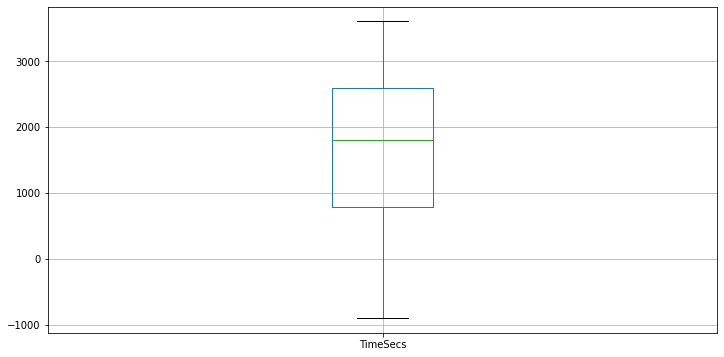

In [43]:
df[col_plt[3:4]].boxplot(figsize=(12,6));

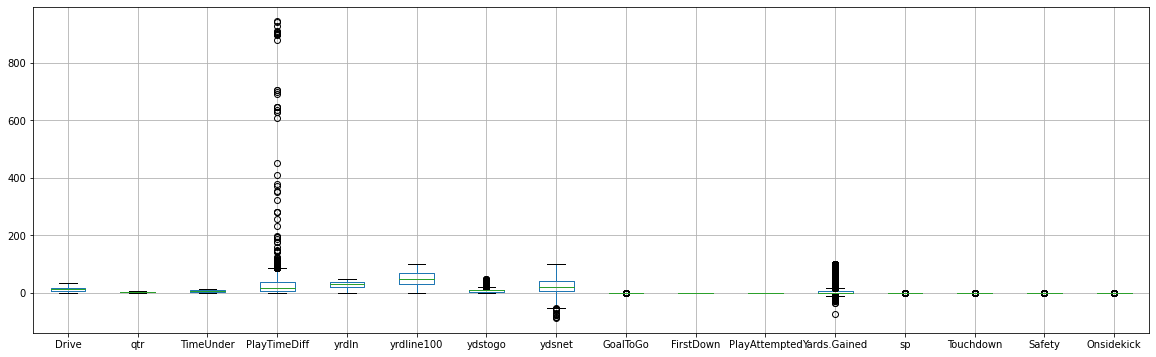

In [46]:
df[col_plt[0:]].boxplot(figsize=(20,6));

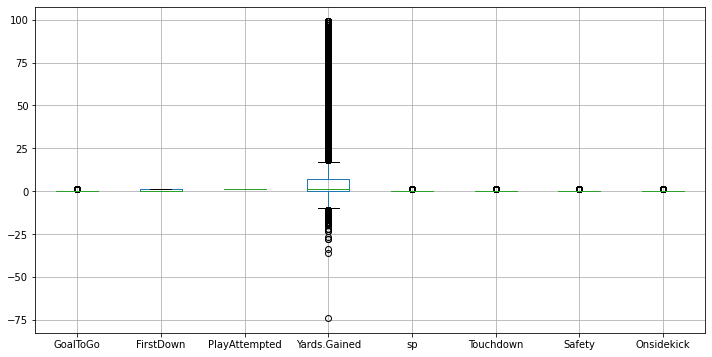

In [49]:
df[col_plt[8:]].boxplot(figsize=(12,6));

### 7- Os boxplots devem sugerir ccolunas que contêm valores anormalmente altos. Para descartar os outliers, podemos calcular a pontuação Z para cada atributo e remover as instâncias que contêm atributos com pontuação Z anormalmente alta ou baixa (por exemplo, se Z > 3 ou Z <= -3).
A pontuação Z é dada por Z=(X-Xmedio)/std, ou seja, o valor de cada atributo vai ser substitui por ele menos a média da coluna, dividido pelo desvio padrão da coluna. 
Observe que os valores omissos (NaN) não são afetados pelo processo de padronização.

In [51]:
# apliquei o z-escore vetorialmente 
Z = (df[col_plt] - df[col_plt].mean())/df[col_plt].std()

In [52]:
Z

,Drive,qtr,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick
0,-1.582079,-1.395727,1.638820,1.790920,-1.142046,0.122065,-0.740206,-1.508207,-1.042081,-0.228074,-0.610173,NaN,3.709621,-0.279281,-0.173553,-0.019823,-0.037065
1,-1.582079,-1.395727,1.638820,1.784335,-0.753818,1.044937,0.372522,0.551207,-0.840989,-0.228074,-0.610173,NaN,-0.005158,-0.279281,-0.173553,-0.019823,-0.037065
2,-1.582079,-1.395727,1.638820,1.749526,0.910015,1.429466,0.173820,-0.478500,-0.961644,-0.228074,-0.610173,NaN,-0.879223,-0.279281,-0.173553,-0.019823,-0.037065
3,-1.582079,-1.395727,1.423190,1.710953,1.131859,1.198749,0.293041,0.139324,-0.961644,-0.228074,-0.610173,NaN,-0.551449,-0.279281,-0.173553,-0.019823,-0.037065
4,-1.582079,-1.395727,1.423190,1.703427,-0.698357,1.198749,0.293041,0.139324,-0.961644,-0.228074,1.638875,NaN,-0.551449,-0.279281,-0.173553,-0.019823,-0.037065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,1.069140,1.258486,-1.380006,-1.575227,-0.809279,0.506595,-0.541505,0.551207,0.365561,-0.228074,-0.610173,NaN,3.272589,3.580618,5.761918,-0.019823,-0.037065
362443,1.069140,1.258486,-1.380006,-1.583694,-0.642896,-1.031524,-1.336310,-1.508207,0.365561,-0.228074,-0.610173,NaN,-0.551449,3.580618,-0.173553,-0.019823,-0.037065
362444,1.208678,1.258486,-1.380006,-1.583694,-1.142046,0.506595,-0.541505,-1.508207,-1.042081,-0.228074,-0.610173,NaN,-0.551449,-0.279281,-0.173553,-0.019823,26.979271
362445,1.208678,1.258486,-1.380006,-1.584635,-1.086585,1.352560,-0.104362,0.551207,-1.082299,-0.228074,-0.610173,NaN,-0.660707,-0.279281,-0.173553,-0.019823,-0.037065


### 8 - Descarte colunas com Z> 3 ou Z <= -3.

In [53]:
# se pelo menos um valor da instância for Z > 3 ou Z<=-3, removo essa instância
df.drop(df.loc[((Z>3).sum(axis=1) + (Z<=-3).sum(axis=1)) >= 1 , col_plt].index, inplace=True)

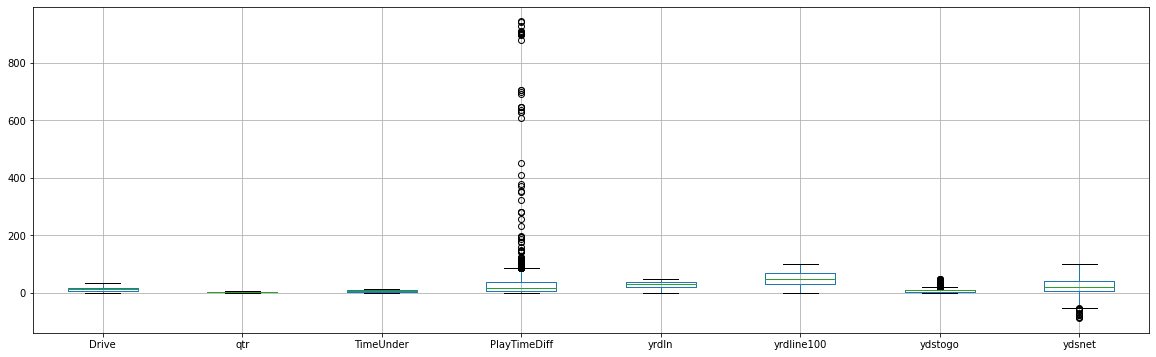

In [48]:
df[col_plt[0:8]].boxplot(figsize=(20,6));

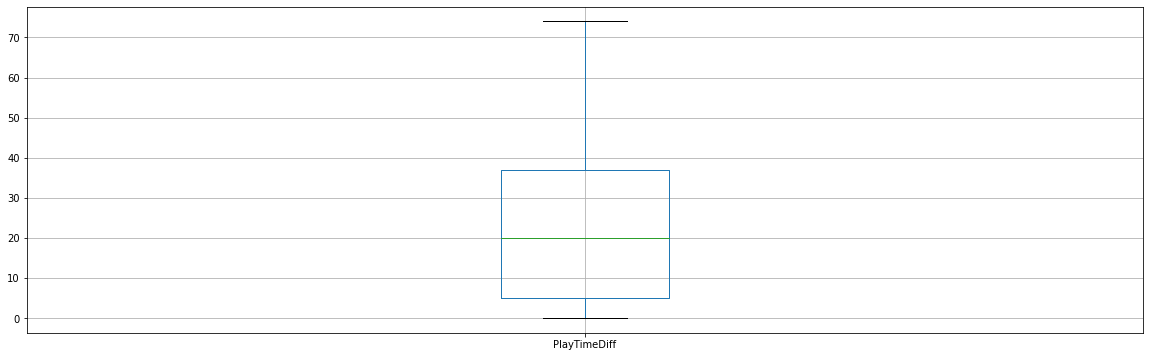

In [60]:
df[col_plt[4:5]].boxplot(figsize=(20,6));

In [45]:
df.shape

(315074, 25)

## Agregação

A agregação de dados é uma tarefa de pré-processamento em que os valores de dois ou mais objetos são combinados em um único objeto. A motivação para agregação inclui (1) reduzir o tamanho dos dados a serem processados, (2) alterar a granularidade da análise (de escala fina para escala mais grosseira) e (3) melhorar a estabilidade dos dados.

Agora utilize os dados da série temporal de precipitação diária para uma estação meteorológica localizada no Detroit Metro Airport (arquivo 'DTW_prec.csv'). Os dados brutos foram obtidos do site Climate Data Online (https://www.ncdc.noaa.gov/cdo-web/). A série temporal de precipitação diária será comparada com os valores mensais.


### Carregue os dados da série temporal de precipitação

In [61]:
df_prec = pd.read_csv('DTW_prec.csv')

In [62]:
df_prec.head()

,DATE,PRCP
0,1/1/2001,0.00
1,1/2/2001,0.00
2,1/3/2001,0.00
3,1/4/2001,0.04
4,1/5/2001,0.14


In [63]:
df_prec.shape

(6191, 2)

In [64]:
df_prec.dtypes

DATE     object
PRCP    float64
dtype: object

### 9 - Desenhe um gráfico de linha das séries temporais diárias.

In [65]:
# converter para o tipo datetime
df_prec['DATE'] = pd.to_datetime(df_prec['DATE']) 

In [66]:
df_prec.set_index('DATE', inplace=True)

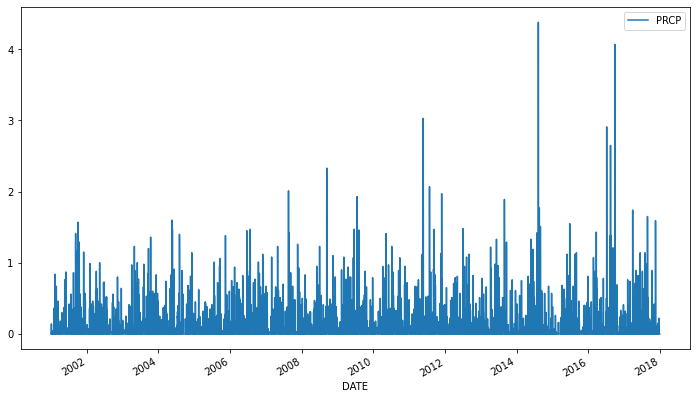

In [67]:
df_prec.plot(figsize=(12, 7));

### 10 - Observe que a série temporal diária parece ser bastante caótica e varia significativamente de um passo para outro.Crie séries temporais agregadas por mês para obter os valores totais mensais de precipitação. Plot a série temporal resultante, ela deve variar mais suavemente em comparação com a série temporal diária.

In [68]:
df_prec

,PRCP
DATE,
2001-01-01,0.00
2001-01-02,0.00
2001-01-03,0.00
2001-01-04,0.04
2001-01-05,0.14
...,...
2017-12-27,0.00
2017-12-28,0.00
2017-12-29,0.00


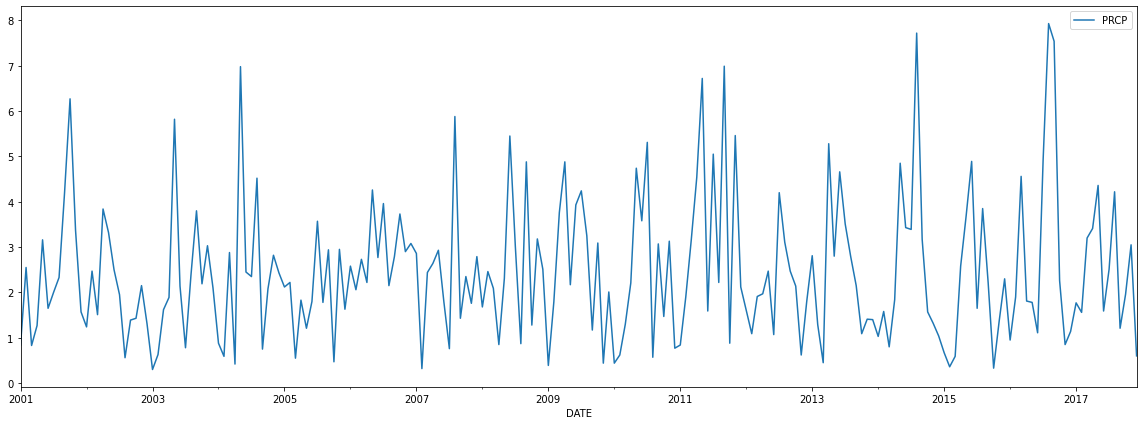

In [69]:
df_prec.groupby(pd.Grouper(freq='M')).sum().plot(figsize=(20, 7));

###  11 -Agora agrupe e agregue por ano para obter os valores de precipitação anuais e plot o resultado.


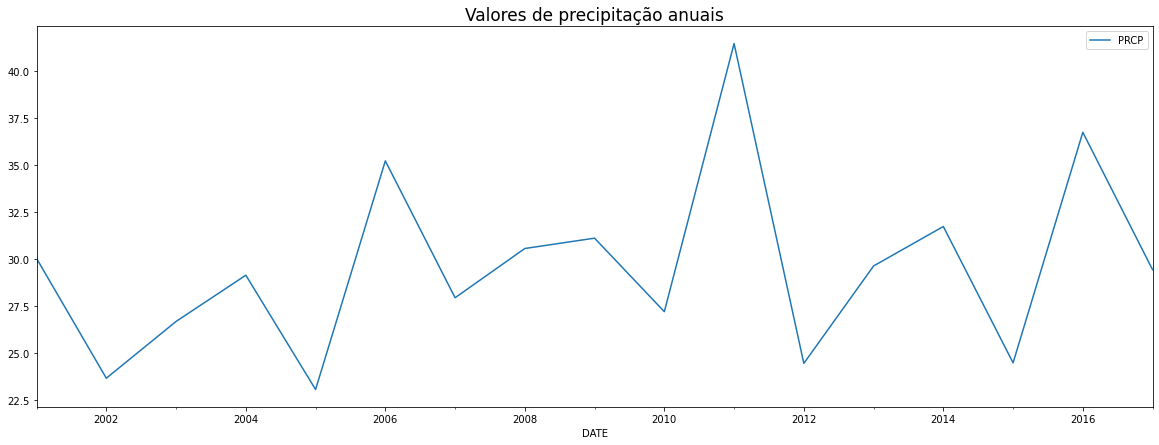

In [70]:
df_prec.groupby(pd.Grouper(freq='Y')).sum().plot(figsize=(20, 7));
plt.title('Valores de precipitação anuais', fontsize=17);

## Sampling - Use os dados NFL Play by Play 

Amostragem é uma abordagem comumente usada para facilitar (1) a redução de dados para análise exploratória de dados e ampliação de algoritmos para aplicações de big data e (2) quantificação de incertezas devido a distribuições de dados variáveis. Existem vários métodos disponíveis para amostragem de dados, como amostragem sem substituição, onde cada instância selecionada é removida do conjunto de dados e amostragem com substituição, onde cada instância selecionada não é removida, permitindo que ela seja selecionada mais de uma vez na amostra .


### 12 - Selecione uma amostra de tamanho 30  aleatoriamente (sem substituição) dos dados NFL Play by Play.


In [73]:
df.sample(30)

,Date,GameID,Drive,qtr,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,...,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PlayType
294543,2015-11-09,2015110900,17,4,13:44,14,824.0,14.0,SD,28.0,...,SD,CHI,"(13:44) (No Huddle, Shotgun) M.Gordon up the m...",1,3,0,0,0,0,Run
267270,2014-12-21,2014122110,27,4,01:32,2,92.0,16.0,OAK,30.0,...,BUF,OAK,"(1:32) (No Huddle, Shotgun) K.Orton pass short...",1,5,0,0,0,0,Pass
294584,2015-11-09,2015110900,20,4,00:34,1,34.0,29.0,SD,42.0,...,CHI,SD,(:34) J.Cutler kneels to SD 43 for -1 yards.,1,-1,0,0,0,0,QB Kneel
29008,2009-11-29,2009112907,10,2,02:01,3,1921.0,33.0,SEA,37.0,...,STL,SEA,(2:01) K.Boller pass short right to S.Jackson ...,1,3,0,0,0,0,Pass
338302,2016-10-31,2016103100,13,3,10:48,11,1548.0,42.0,MIN,17.0,...,CHI,MIN,(10:48) (Shotgun) J.Howard left end to MIN 11 ...,1,6,0,0,0,0,Run
293530,2015-11-08,2015110806,11,2,05:19,6,2119.0,40.0,PIT,27.0,...,PIT,OAK,(5:19) A.Brown right end to PIT 43 for 16 yard...,1,16,0,0,0,0,Run
105667,2011-10-23,2011102302,15,3,03:46,4,1126.0,38.0,HOU,31.0,...,HOU,TEN,(3:46) B.Tate left guard to HOU 35 for 4 yards...,1,4,0,0,0,0,Run
80722,2010-12-13,2010121301,18,3,06:09,7,1269.0,62.0,MIN,40.0,...,NYG,MIN,(6:09) (Shotgun) E.Manning sacked at MIN 45 fo...,1,-5,0,0,0,0,Sack
17956,2009-11-01,2009110100,11,2,03:06,4,1986.0,39.0,DEN,35.0,...,DEN,BAL,(3:06) (Shotgun) K.Orton pass short left to E....,1,7,0,0,0,0,Pass
186195,2013-09-22,2013092209,7,2,13:39,14,2619.0,35.0,WAS,35.0,...,WAS,DET,(13:39) (Shotgun) A.Morris right end to WAS 37...,1,2,0,0,0,0,Run


### 13 - Selecione aleatoriamente 1% dos dados (sem substituição) e exiba as amostras selecionadas. 

In [74]:
df.sample(frac=0.01)

,Date,GameID,Drive,qtr,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,...,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PlayType
299673,2015-11-26,2015112600,8,2,05:55,6,2155.0,43.0,PHI,34.0,...,DET,PHI,(5:55) (Shotgun) A.Abdullah left end pushed ob...,1,4,0,0,0,0,Run
295863,2015-11-15,2015111507,6,1,02:51,3,2871.0,40.0,CLE,41.0,...,CLE,PIT,(2:51) T.Benjamin right end to CLE 34 for -7 y...,1,-7,0,0,0,0,Run
114154,2011-11-13,2011111311,7,2,14:24,15,2664.0,36.0,SEA,31.0,...,SEA,BAL,"(14:24) J.Ryan punts 44 yards to BAL 25, Cente...",1,9,0,0,0,0,Punt
250465,2014-11-09,2014110906,18,4,01:13,2,73.0,16.0,TB,43.0,...,TB,ATL,(1:13) J.McCown spiked the ball to stop the cl...,1,0,0,0,0,0,Spike
82825,2010-12-19,2010121905,11,2,01:15,2,1875.0,4.0,WAS,41.0,...,DAL,WAS,(1:15) (Shotgun) F.Jones left end to WAS 32 fo...,1,9,0,0,0,0,Run
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224698,2013-12-29,2013122913,19,4,04:39,5,279.0,29.0,DEN,35.0,...,OAK,DEN,(4:39) (Shotgun) T.Pryor pass incomplete short...,1,0,0,0,0,0,Pass
75470,2010-11-29,2010112900,19,3,01:46,2,1006.0,4.0,MID,50.0,...,SF,ARI,(1:46) T.Smith pass incomplete deep left to M....,1,0,0,0,0,0,Pass
21104,2009-11-08,2009110805,10,2,02:18,3,1938.0,27.0,MIA,20.0,...,NaN,NaN,Timeout #2 by NE at 02:18.,1,0,0,0,0,0,Timeout
41329,2009-12-27,2009122708,27,4,02:00,2,120.0,18.0,DEN,5.0,...,NaN,NaN,Two-Minute Warning,1,0,0,0,0,0,Two Minute Warning


### 14 - Realize uma amostragem com substituição para criar uma amostra cujo tamanho é igual a 1% de todos os dados. Você deve poder observar instâncias duplicadas na amostra ao aumentar o tamanho da amostra.

In [75]:
df.sample(frac=0.01, replace=True)

,Date,GameID,Drive,qtr,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,...,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PlayType
164445,2012-11-25,2012112507,7,1,02:32,3,2852.0,39.0,MIA,48.0,...,SEA,MIA,(2:32) (Punt formation) J.Ryan punts 38 yards ...,1,0,0,0,0,0,Punt
314474,2016-01-03,2016010309,13,3,02:40,3,1060.0,42.0,MID,50.0,...,DET,CHI,(2:40) (Shotgun) M.Stafford pass incomplete de...,1,0,0,0,0,0,Pass
275778,2015-09-20,2015092010,17,4,08:22,9,502.0,38.0,OAK,15.0,...,BAL,OAK,(8:22) J.Flacco up the middle to OAK 13 for 2 ...,1,2,0,0,0,0,Run
129655,2011-12-24,2011122406,6,1,01:20,2,2780.0,36.0,WAS,12.0,...,MIN,WAS,(1:20) A.Peterson right guard to WAS 10 for 2 ...,1,2,0,0,0,0,Run
172935,2012-12-16,2012121601,4,1,06:41,7,3101.0,44.0,ATL,24.0,...,ATL,NYG,(6:41) M.Turner left end to ATL 27 for 3 yards...,1,3,0,0,0,0,Run
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42283,2010-01-03,2010010310,12,2,04:09,5,2049.0,5.0,ATL,30.0,...,TB,ATL,M.Koenen kicks 58 yards from ATL 30 to TB 12. ...,1,0,0,0,0,0,Kickoff
32173,2009-12-06,2009120603,15,3,12:05,13,1625.0,22.0,CIN,43.0,...,CIN,DET,(12:05) C.Palmer up the middle to CIN 45 for 2...,1,2,0,0,0,0,Run
251535,2014-11-13,2014111300,18,4,03:08,4,188.0,0.0,BUF,14.0,...,MIA,BUF,(3:08) (Shotgun) R.Tannehill pass incomplete s...,1,0,0,0,0,0,Pass
48128,2010-09-19,2010091906,11,2,03:12,4,1992.0,34.0,DET,13.0,...,DET,PHI,(3:12) (Shotgun) Sh.Hill scrambles up the midd...,1,13,0,0,0,0,Run


## Discretização

Discretização é uma etapa de pré-processamento de dados que é frequentemente usada para transformar um atributo de valor contínuo em um atributo categórico. O exemplo abaixo ilustra dois métodos de discretização simples, mas amplamente utilizados (largura igual e frequência igual).

### 15 -  Plot um histograma que mostra a distribuição dos valores do atributo "TimeSecs". A função value_counts() também pode ser aplicada para contar a frequência de cada valor de atributo.

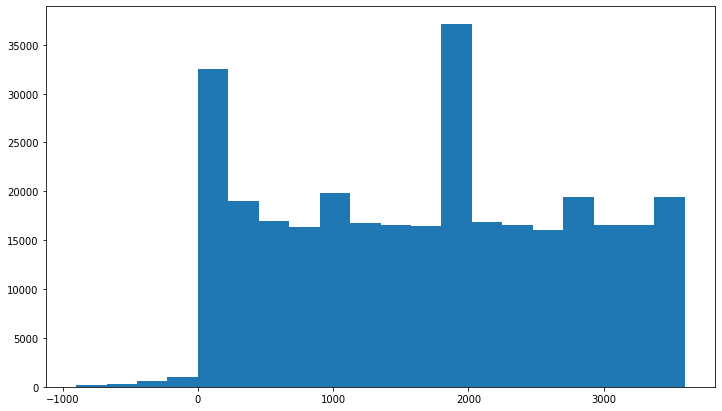

In [78]:
plt.figure(figsize=(12,7))
plt.hist(x='TimeSecs', data=df, bins=20);

### 16 - Para o método de largura igual, aplique a função cut() para discretizar o atributo em 4 bins de larguras de intervalo semelhantes. A função value_counts() pode ser usada para determinar o número de instâncias em cada bin.


In [79]:
df['TimeSecs'].value_counts(bins=4)

(1350.0, 2475.0]     103528
(225.0, 1350.0]       88905
(2475.0, 3600.0]      87838
(-904.501, 225.0]     34803
Name: TimeSecs, dtype: int64

In [74]:
timesecs_largura = pd.cut(x=df['TimeSecs'], bins=[-904.501, 225.0, 1350.0, 2475.0, 3600.0], labels=['faixa-1', 'faixa-2', 'faixa-3', 'faixa-4'])

In [75]:
timesecs_largura.value_counts()

faixa-3    103528
faixa-2     88905
faixa-4     87838
faixa-1     34803
Name: TimeSecs, dtype: int64

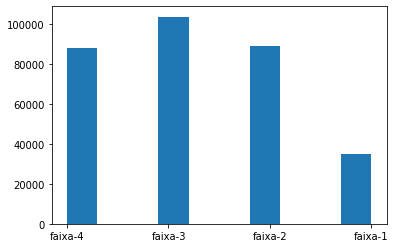

In [77]:
plt.hist(x=timesecs_largura.values, data=timesecs_largura);

### 17 -Para o método de frequência igual, aplique a função qcut() ppara particionar os valores em 4 compartimentos, de forma que cada bin tenha quase o mesmo número de instâncias.


In [80]:
df['TimeSecs'].value_counts(bins=4)

(1350.0, 2475.0]     103528
(225.0, 1350.0]       88905
(2475.0, 3600.0]      87838
(-904.501, 225.0]     34803
Name: TimeSecs, dtype: int64

In [86]:
pd.qcut(x=df['TimeSecs'], q=4).value_counts()

(783.0, 1800.0]      81654
(-900.001, 783.0]    78812
(2600.0, 3600.0]     78729
(1800.0, 2600.0]     75879
Name: TimeSecs, dtype: int64

In [84]:
timesecs_frequencia.value_counts()

faixa-2    81654
faixa-1    78812
faixa-4    78729
faixa-3    75879
Name: TimeSecs, dtype: int64

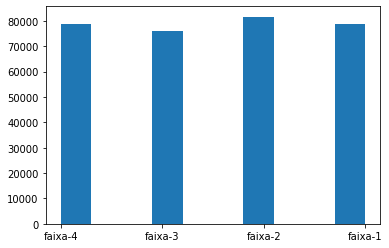

In [85]:
plt.hist(x=timesecs_frequencia.values, data=timesecs_frequencia);


**<font color='blue'>References:</font>**

1. Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

2. Mangasarian, O.L. and Wolberg, W. H. (1990). "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, pp 1 & 18.

3. Wolberg, W.H. and Mangasarian, O.L. (1990). "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, pp 9193-9196. 

4. Climate Data Online [https://www.ncdc.noaa.gov/cdo-web/]. 